In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [23]:
train_dir = f'train.csv'
test_dir = f'test.csv'


In [25]:
train_data = pd.read_csv(train_dir)

In [27]:
print(train_data.head())

   id  person_age  person_income person_home_ownership  person_emp_length  \
0   0          37          35000                  RENT                0.0   
1   1          22          56000                   OWN                6.0   
2   2          29          28800                   OWN                8.0   
3   3          30          70000                  RENT               14.0   
4   4          22          60000                  RENT                2.0   

  loan_intent loan_grade  loan_amnt  loan_int_rate  loan_percent_income  \
0   EDUCATION          B       6000          11.49                 0.17   
1     MEDICAL          C       4000          13.35                 0.07   
2    PERSONAL          A       6000           8.90                 0.21   
3     VENTURE          B      12000          11.11                 0.17   
4     MEDICAL          A       6000           6.92                 0.10   

  cb_person_default_on_file  cb_person_cred_hist_length  loan_status  
0              

In [29]:
print(train_data.shape)

(58645, 13)


In [31]:
train_data.describe()

,id,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status
count,58645.000000,58645.000000,5.864500e+04,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000
mean,29322.000000,27.550857,6.404617e+04,4.701015,9217.556518,10.677874,0.159238,5.813556,0.142382
std,16929.497605,6.033216,3.793111e+04,3.959784,5563.807384,3.034697,0.091692,4.029196,0.349445
min,0.000000,20.000000,4.200000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,0.000000
25%,14661.000000,23.000000,4.200000e+04,2.000000,5000.000000,7.880000,0.090000,3.000000,0.000000
50%,29322.000000,26.000000,5.800000e+04,4.000000,8000.000000,10.750000,0.140000,4.000000,0.000000
75%,43983.000000,30.000000,7.560000e+04,7.000000,12000.000000,12.990000,0.210000,8.000000,0.000000
max,58644.000000,123.000000,1.900000e+06,123.000000,35000.000000,23.220000,0.830000,30.000000,1.000000


In [33]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(6), object

In [35]:
empty_values=train_data.isnull().sum()
print(empty_values)

id                            0
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
loan_status                   0
dtype: int64


so no null values

In [38]:
print(train_data.loan_status.value_counts())

loan_status
0    50295
1     8350
Name: count, dtype: int64


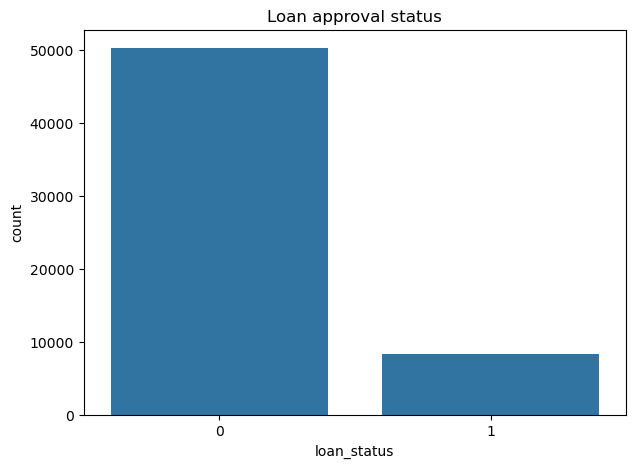

In [40]:
plt.figure(figsize=(7,5))
sns.countplot(x='loan_status',data=train_data)
plt.title('Loan approval status')
plt.show()

In [42]:
print(train_data.loan_intent.value_counts())

loan_intent
EDUCATION            12271
MEDICAL              10934
PERSONAL             10016
VENTURE              10011
DEBTCONSOLIDATION     9133
HOMEIMPROVEMENT       6280
Name: count, dtype: int64


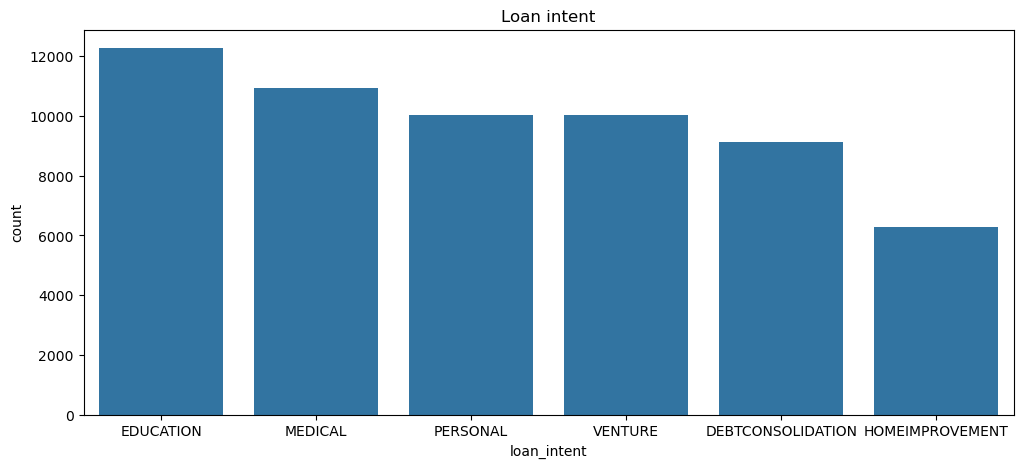

In [44]:
plt.figure(figsize=(12,5))
sns.countplot(x='loan_intent',data=train_data)
plt.title('Loan intent')
plt.show()

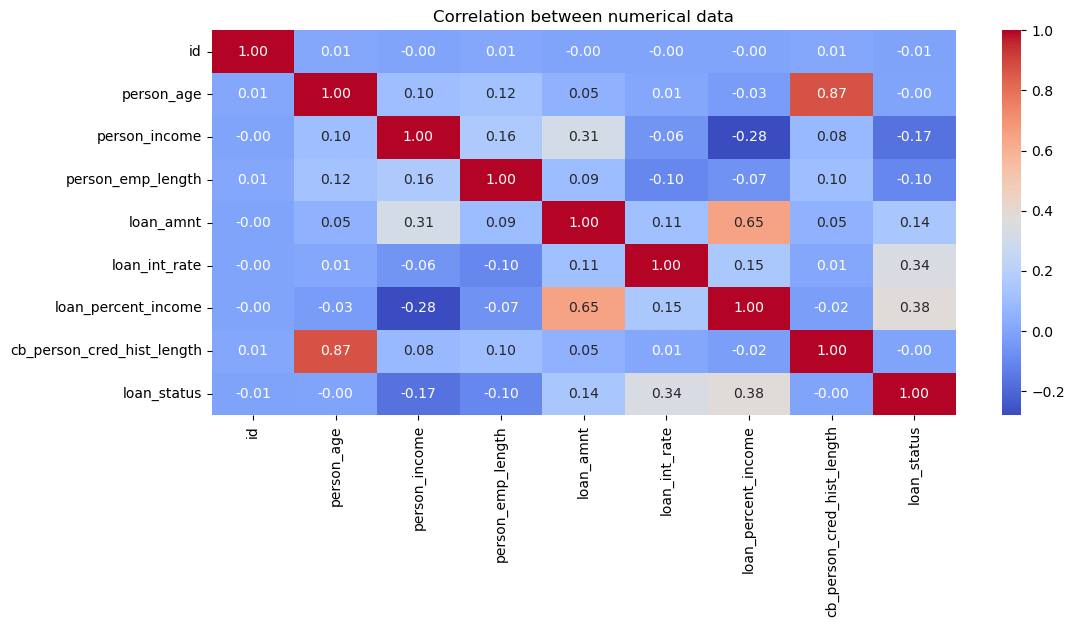

In [46]:
num_data=train_data.select_dtypes(exclude='object')
plt.figure(figsize=(12,5))
sns.heatmap(num_data.corr(),annot=True,fmt='.2f',cmap='coolwarm')
plt.title('Correlation between numerical data')
plt.show()

In [48]:
train_data = pd.get_dummies(train_data, drop_first=True)
X=train_data.drop('loan_status',axis=1)
y=train_data['loan_status']

In [50]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [53]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [55]:
  y_pred = model.predict(X_test)

  print("Accuracy: ",accuracy_score(y_test, y_pred))
  print("Classification Report: \n",classification_report(y_test, y_pred))
  print("Confusion Matrix: \n",confusion_matrix(y_test, y_pred))

Accuracy:  0.9510614715662035
Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.99      0.97     10087
           1       0.91      0.72      0.80      1642

    accuracy                           0.95     11729
   macro avg       0.93      0.85      0.89     11729
weighted avg       0.95      0.95      0.95     11729

Confusion Matrix: 
 [[9976  111]
 [ 463 1179]]


In [58]:
test_data = pd.read_csv(test_dir)

In [60]:
test_data = pd.get_dummies(test_data, drop_first=True)
y_pred = model.predict(test_data)


In [62]:
submission = pd.DataFrame({'id': test_data['id'], 'loan_status': y_pred})
submission.to_csv('submission.csv', index=False)

In [64]:
import joblib

joblib.dump(model, 'loan_prediction_model.pkl')

['loan_prediction_model.pkl']